In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['figure.figsize']=(10,8)

In [3]:
cd ~/Dropbox/DDocuments/DIVINER/ground_calib/

/Users/klay6683/Dropbox/DDocuments/DIVINER/ground_calib


In [4]:
pd.HDFStore('ground_calib_spreadsheet_data.h5')

<class 'pandas.io.pytables.HDFStore'>
File path: ground_calib_spreadsheet_data.h5
/allifvaltime_2            frame        (shape->[481,1]) 
/allifvaltime_3            frame        (shape->[369,1]) 
/allvfvaltime_2            frame        (shape->[452,1]) 
/allvfvaltime_3            frame        (shape->[436,1]) 
/chamberdata               frame        (shape->[1412,1])
/iftemps_2                 frame        (shape->[481,1]) 
/iftemps_3                 frame        (shape->[369,1]) 
/vftemps_2                 frame        (shape->[452,1]) 
/vftemps_3                 frame        (shape->[347,1]) 

In [5]:
chamberdata= pd.read_hdf('ground_calib_spreadsheet_data.h5','chamberdata')

In [6]:
chamberdata.columns

Index([      u'Time', u'Fixed BB T',   u'Var BB T',      u'BB1 T',
            u'BB2 T',      u'FPA T',      u'FPB T',      u'OBA T',
            u'a3_01',      u'a3_02', 
       ...
            u'b3_12',      u'b3_13',      u'b3_14',      u'b3_15',
            u'b3_16',      u'b3_17',      u'b3_18',      u'b3_19',
            u'b3_20',      u'b3_21'],
      dtype='object', length=155)

In [7]:
hk = pd.read_hdf('/Volumes/Data/backup/data/diviner/ground_calib/house_keeping.h5','df')

In [8]:
hk[hk < -9998] = np.nan

In [9]:
hk[hk['TEMP_FAULT'] == 1]=np.nan

In [10]:
hk.LAST_EL_CMD = hk.LAST_EL_CMD.fillna(method='pad')

<IPython.core.display.Javascript object>


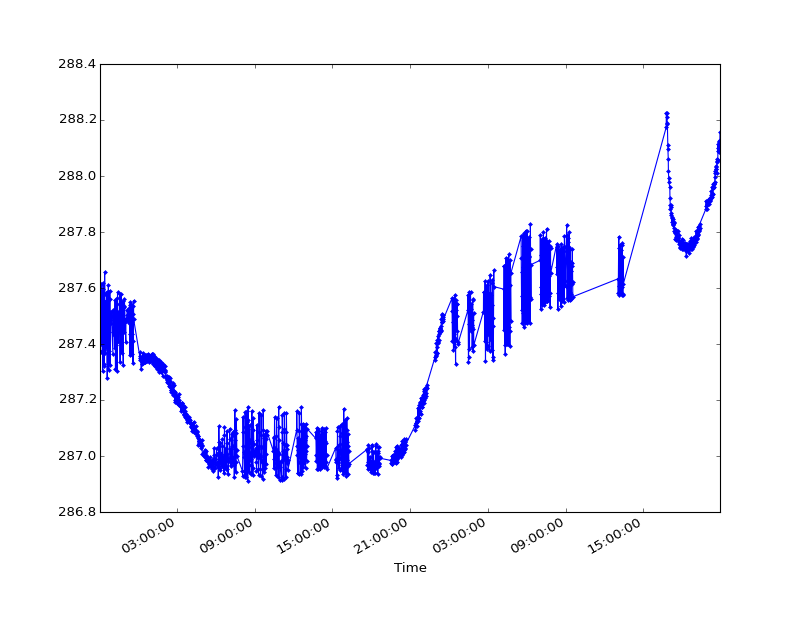

In [11]:
plt.figure()
chamberdata['OBA T'].dropna().plot(style='.-')

In [12]:
hktcols = [col for col in hk.columns if 'TEMP' in col]

In [13]:
t0 = pd.Timestamp('2001-01-01 00:00:00')

In [14]:
chamberdata.index = t0 + pd.to_timedelta(chamberdata.Time, unit='s')

<IPython.core.display.Javascript object>


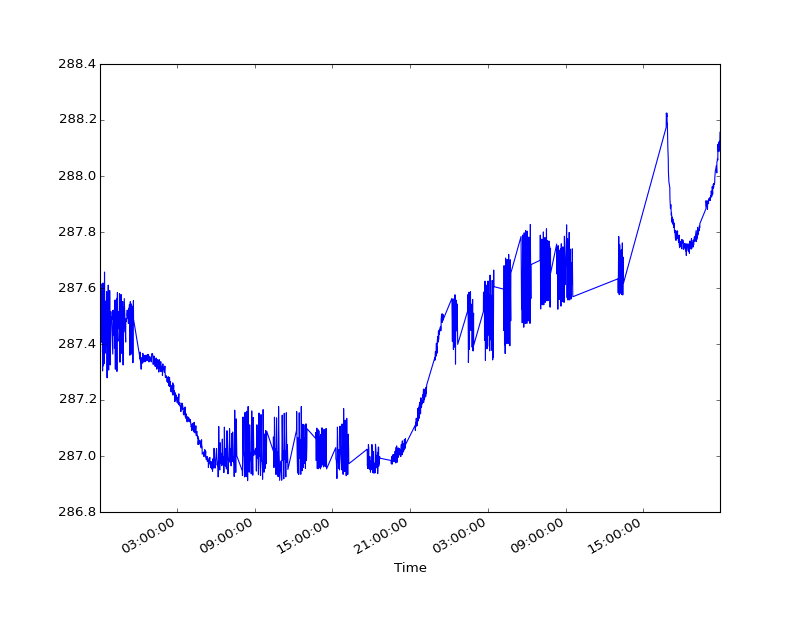

In [15]:
plt.figure()
chamberdata[1:]['OBA T'].dropna().plot()

<IPython.core.display.Javascript object>


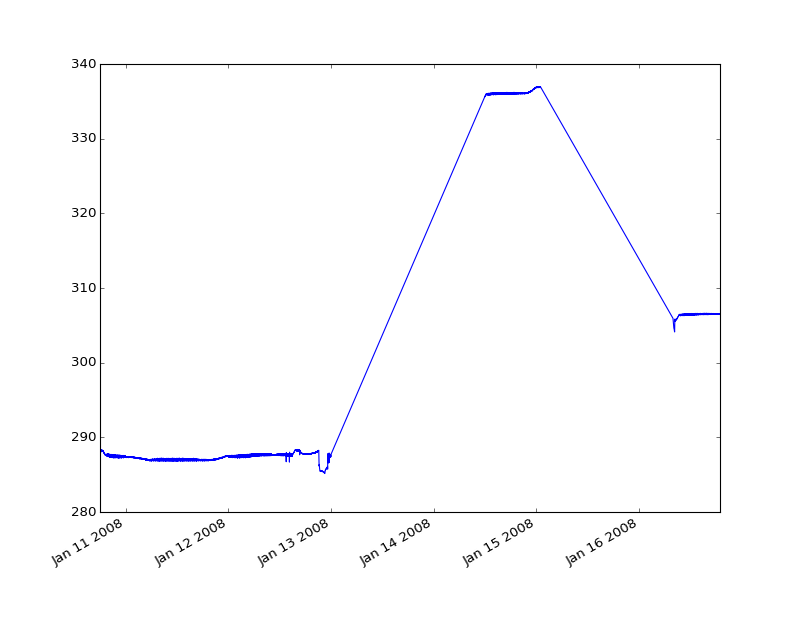

In [16]:
plt.figure()
hk.OBA_1_TEMP_CYC.dropna().plot()

In [17]:
!ls

2008011201_L1A_Plot3.pdf                     counts_vs_temps.png
Diviner Radiometric Cal Ramp 2.xlsx          gc_a6_b1_b2_b3_d11_2008011021-2008011109.png
Diviner Radiometric Cal Ramp 3.xlsx          gc_a6_b1_b2_b3_d11_2008011109-2008011121.png
allifvaltime_2.h5                            gc_a6_b1_b2_b3_d11_2008011121-2008011209.png
allifvaltime_3.h5                            gc_a6_b1_b2_b3_d11_2008011209-2008011221.png
allvfvaltime_2.h5                            gc_a6_b1_b2_b3_d11_2008011221-2008011309.png
allvfvaltime_3.h5                            ground_calib_spreadsheet_data.h5
b1_11_2008011021-2008011109.png              ground_calib_spreadsheet_data.h5.backup
b1_11_2008011109-2008011121.png              iftemps_2.h5
b1_11_2008011121-2008011209.png              iftemps_3.h5
b1_11_2008011209-2008011221.png              marc_foote_counts_and_chamber_data.xlsx
b1_11_2008011221-2008011309.png              vftemps_2.h5
chamberdata.h5                               vftemps_3.h5


In [ ]:
store = pd.HDFStore('ground_calib_spreadsheet_data.h5')

In [ ]:
cp ground_calib_spreadsheet_data.h5 ground_calib_spreadsheet_data.h5.backup


In [ ]:
for key in store.keys():
    df = store[key]
    df.index = t0 + pd.to_timedelta(df.Time, unit='s')
    store[key] = df

In [20]:
t0

Timestamp('2001-01-01 00:00:00')

In [ ]:
store.close()

In [ ]:
pd.HDFStore('ground_calib_spreadsheet_data.h5')

In [19]:
pd.read_hdf('ground_calib_spreadsheet_data.h5', 'chamberdata')

,Time,Fixed BB T,Var BB T,BB1 T,BB2 T,FPA T,FPB T,OBA T,a3_01,a3_02,...,b3_12,b3_13,b3_14,b3_15,b3_16,b3_17,b3_18,b3_19,b3_20,b3_21
Time,,,,,,,,,,,,,,,,,,,,,
2008-01-10 21:03:52.738,2.216918e+08,91.496039,20.953206,289.039125,288.921989,285.744500,285.795625,287.376000,0.701149,-0.464309,...,-45.597354,-48.483706,-44.134897,-43.208116,-44.617604,-42.689515,-41.038529,-42.537526,-40.618196,-32.709710
2008-01-10 21:04:27.042,2.216919e+08,91.478185,21.031436,288.945625,288.878461,285.742250,285.774500,287.546000,0.279037,-0.325523,...,-45.086091,-47.309381,-43.898254,-42.395588,-44.884098,-43.365207,-40.641203,-42.458153,-38.908414,-33.114429
2008-01-10 21:06:16.097,2.216920e+08,90.781601,20.729113,289.030000,288.915737,285.722000,285.731500,287.401000,1.488447,0.791298,...,-44.934751,-46.661946,-42.878662,-41.547724,-44.048771,-41.780070,-41.871625,-42.166158,-38.645145,-32.728246
2008-01-10 21:06:50.401,2.216920e+08,90.793402,20.548585,288.889000,288.841360,285.706000,285.719750,287.369750,-0.142818,0.292132,...,-45.646113,-45.594897,-42.331532,-42.554207,-43.117757,-41.705114,-40.674476,-41.049738,-39.363263,-33.800622
2008-01-10 21:08:39.456,2.216921e+08,90.880931,20.482356,289.061000,288.918000,285.705000,285.701375,287.615000,0.656175,0.084544,...,-46.464388,-46.765446,-43.612145,-42.322117,-45.404985,-42.286772,-40.772225,-42.539797,-38.613747,-32.633978
2008-01-10 21:09:13.760,2.216922e+08,90.935243,20.620483,288.979875,288.880562,285.700500,285.678000,287.499250,-0.617789,-1.283872,...,-45.641406,-46.734413,-42.989133,-41.712132,-43.737750,-41.942131,-40.989966,-42.163956,-38.282301,-32.502151
2008-01-10 21:11:02.815,2.216923e+08,91.177195,21.179718,289.029375,288.909926,285.679000,285.648500,287.449000,0.121650,0.152777,...,-45.137112,-46.701009,-42.695502,-42.440813,-42.889205,-42.654688,-40.625313,-42.162819,-39.145150,-32.504634
2008-01-10 21:11:37.119,2.216923e+08,91.148204,21.391607,288.891125,288.829517,285.652000,285.619125,287.588500,-0.395783,0.390598,...,-45.348557,-45.345081,-43.566581,-42.440290,-44.189088,-42.088879,-40.883510,-41.946419,-38.512958,-31.997907
2008-01-10 21:13:26.174,2.216924e+08,91.078554,22.042338,289.037375,288.917947,285.632500,285.605625,287.406000,0.681075,-0.145684,...,-46.255617,-46.119459,-42.956796,-42.319419,-44.454415,-42.454134,-40.932680,-42.902930,-38.671601,-32.731713


In [18]:
pd.read_hdf('ground_calib_spreadsheet_data.h5', 'iftemps_2')

,Time,Fixed BB T,Var BB T,BB1 T,BB2 T,FPA T,FPB T,OBA T
Time,,,,,,,,
2008-01-14 12:06:16.127,2.220052e+08,86.390547,88.338372,335.197750,335.380863,331.437250,332.158375,335.68350
2008-01-14 12:06:52.480,2.220052e+08,86.466657,88.395637,335.025625,335.451769,331.465000,332.179000,335.69100
2008-01-14 12:08:39.490,2.220053e+08,86.589492,88.405275,335.179000,335.379738,331.479250,332.188875,335.72650
2008-01-14 12:09:15.843,2.220054e+08,86.481310,88.320670,335.084375,335.473905,331.517000,332.205875,335.74100
2008-01-14 12:11:02.854,2.220055e+08,86.194299,88.008776,335.102250,335.330621,331.540250,332.220000,335.78050
2008-01-14 12:11:39.207,2.220055e+08,86.090589,87.863602,334.994000,335.436420,331.590000,332.261625,335.80600
2008-01-14 12:13:26.218,2.220056e+08,86.254596,88.028825,335.212750,335.374000,331.577500,332.242875,335.81350
2008-01-14 12:14:02.571,2.220056e+08,86.283735,88.103604,335.059000,335.477853,331.604000,332.262625,335.83400
2008-01-14 12:15:49.582,2.220057e+08,86.341564,88.087429,335.156625,335.377506,331.633500,332.281125,335.87275
